# Evaluate tracking efficiency for muon MC datasets

 
We want to compare the provided base tracks of each MCTrack with the reconstructed track

The functions were initially used in FOOT

usage: python trackingquality.py foldercontainingbricks


In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn #for regplot, equivalent as tprofile
import fedra2scipy_utils
import numpy as np

Welcome to JupyROOT 6.26/10
Load FEDRA libs


### Load Muon MC simulation into dataframe

In [2]:
minnseg = 31

simdf = pd.DataFrame()
#brickIDs = [11,12,13,14,21,22,23,24,25,31,32,33,34,41,42,43,44,51,52,53,54]
brickIDs = [11]

In [3]:
# prepath = sys.argv[1]
prepath = '/eos/user/a/aiulian/sim_fedra/muonbkg_1E5cm2_b000011/'

In [4]:
for brID in brickIDs:
    singledf = pd.read_csv(prepath+"/b0000{}/brick{}.csv".format(brID,brID))
    singledf["brickID"] = brID
    #singledf = singledf.query(signalselection) #if we want to see only primary tracks
    simdf = pd.concat([simdf,singledf],axis=0)
#simdf = pd.read_csv("/eos/user/a/aiulian/sim_fedra/SNDnuyield_17_November_2021/b000032/brick32.csv")

In [5]:
# looking at the reconstructed base tracks that originated from MC Event 2, Track 0
simdf.query('MCEvent==2 and MCTrack==0')

,ID,PID,x,y,z,TX,TY,MCEvent,MCTrack,MCMotherID,P,PdgCode,FEDRATrackID,brickID
2,221,0,296655.94,88811.510,0.0,-0.002633,0.003076,2,0,-1,1577.0330,13,2.0,11
130822,220,1,296661.00,88813.070,-1315.0,-0.005467,-0.002011,2,0,-1,1577.0349,13,2.0,11
261412,219,2,296666.06,88814.650,-2630.0,-0.005694,-0.000128,2,0,-1,1577.0370,13,2.0,11
392138,218,3,296671.10,88816.234,-3945.0,-0.001789,0.001543,2,0,-1,1577.0393,13,2.0,11
522757,217,4,296676.12,88817.836,-5260.0,-0.003015,-0.002163,2,0,-1,1577.0415,13,2.0,11
653143,216,5,296681.16,88819.420,-6575.0,-0.011378,-0.006056,2,0,-1,1577.0440,13,2.0,11
783583,215,6,296686.20,88821.000,-7890.0,-0.005054,-0.004327,2,0,-1,1577.0460,13,2.0,11
1043442,214,8,296696.20,88824.170,-10520.0,-0.005138,-0.005127,2,0,-1,1577.0618,13,2.0,11
1172990,213,9,296701.20,88825.770,-11835.0,-0.005723,-0.001817,2,0,-1,1577.0642,13,2.0,11
1302260,212,10,296706.20,88827.350,-13150.0,-0.007785,-0.007720,2,0,-1,1577.0667,13,NaN,11


In [6]:
len(simdf)

6873190

In [11]:
# Counting segments associated to the reconstructed track and to true MCTracks 

nseg = simdf.groupby(["brickID","FEDRATrackID"]).count()["ID"] #number of segments associated to each reconstructed track
nsegsamemc = simdf.groupby(["brickID","FEDRATrackID","MCEvent","MCTrack"]).count()["PID"] #associated to the true MC track

## df with less smearing (1mrad)

Test reduction of smearing with different MC simulation to compare efficiency with first

In [57]:
minnseg = 31

df = pd.DataFrame()
brickIDs = [11] # only for brick 11 again

prepath = '/eos/user/a/aiulian/sim_fedra/muonbkg_1E5cm2_b000011/b000011_smearing_001/'

for brID in brickIDs:
    singledf = pd.read_csv(prepath+"brick{}.csv".format(brID,brID))
    singledf["brickID"] = brID
    #singledf = singledf.query(signalselection) #if we want to see only primary tracks
    df = pd.concat([df,singledf],axis=0)

## df where only muons were tracked

Try tracking only muons to see if that improves reconstruction efficiency

In [46]:
# takes 25 minutes to run
csvfile = '/eos/user/a/aiulian/sim_fedra/muonbkg_1E5cm2_b000011/b000011/brick11.csv'
trackfile = '/eos/user/a/aiulian/sim_fedra/muonbkg_1E5cm2_b000011/b000011/run_01_muons.trk.root'
df = pd.read_csv(csvfile)

del df['FEDRATrackID']

df = fedra2scipy_utils.addtrackindex(df, trackfile)


start loop on 130405 tracks
Track dataframe ready: merging it with all couples dataframe: not tracked segments will be labelled as NA


In [47]:
# save as csv for future use, don't have to run previous cell every time
df.to_csv("muons_b11_sim_onlymuons.csv", index=False)

In [58]:
# save this as the muon dataframe
df_m = df

In [36]:
# if you already have the csv, just open that instead of running it again
df_m = pd.read_csv("muons_b11_sim_onlymuons.csv")

## df with 1000 or 10000 muons tracked (the original file has 100000)

In [12]:
# takes less than 25 minutes to run, but still a while
csvfile = '/eos/user/a/aiulian/sim_fedra/muonbkg_1E5cm2_b000011/b000011/brick11.csv'
trackfile = '/eos/user/a/aiulian/sim_fedra/muonbkg_1E5cm2_b000011/b000011/run_01_1000evts.trk.root'
df_1k = pd.read_csv(csvfile)

del df_1k['FEDRATrackID']

df_1k = fedra2scipy_utils.addtrackindex(df_1k, trackfile)


start loop on 1551 tracks
Track dataframe ready: merging it with all couples dataframe: not tracked segments will be labelled as NA


In [13]:
# takes less than 25 minutes to run, but still a while
csvfile = '/eos/user/a/aiulian/sim_fedra/muonbkg_1E5cm2_b000011/b000011/brick11.csv'
trackfile = '/eos/user/a/aiulian/sim_fedra/muonbkg_1E5cm2_b000011/b000011/run_01_10000evts.trk.root'
df_10k = pd.read_csv(csvfile)

del df_10k['FEDRATrackID']

df_10k = fedra2scipy_utils.addtrackindex(df_10k, trackfile)


start loop on 17458 tracks
Track dataframe ready: merging it with all couples dataframe: not tracked segments will be labelled as NA


## Second dataframe - comparison with original

This is where we rearrange the dataframes loaded up above. We currently have it structured to compare the original dataset to 2 other dataframes, but this can be altered to more or less if needed. Currently, it is comparing 3 different track densities.

In [14]:
otherdf_1 = df_1k # only 1k events reconstructed
otherdf_2 = df_10k # only 10k events reconstructed 

In [15]:
otherdf_1['brickID'] = 11
otherdf_2['brickID'] = 11

In [60]:
# here we have the muon-only tracking - so you can add in more datasets like this to compare later on!
otherdf_m = df_m
otherdf_m['brickID'] = 11

In [16]:
# this is what the selected datasets look like, just like the original
otherdf_2

,ID,PID,x,y,z,TX,TY,MCEvent,MCTrack,MCMotherID,P,PdgCode,FEDRATrackID,brickID
0,47,0,296295.80,85580.000,0.0,-0.006065,0.011420,0,0,-1,1020.901250,13,0.0,11
1,169,0,295677.22,91894.945,0.0,-0.000804,0.000903,1,0,-1,561.202700,13,1.0,11
2,221,0,296655.94,88811.510,0.0,-0.002633,0.003076,2,0,-1,1577.033000,13,2.0,11
3,403,0,296555.06,87590.130,0.0,0.051350,-0.143269,2,239,238,0.109107,11,NaN,11
4,747,0,292819.34,93633.950,0.0,0.002478,0.001076,6,0,-1,43.166390,13,3.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6873185,6872832,59,290267.16,87954.360,-77585.0,-0.004896,0.001112,99995,0,-1,1371.006000,13,NaN,11
6873186,6872922,59,294817.38,90904.950,-77585.0,-0.000141,0.006168,99996,0,-1,628.050100,13,NaN,11
6873187,6872975,59,292487.56,89408.640,-77585.0,-0.002343,-0.004945,99997,0,-1,50.221516,13,NaN,11
6873188,6873042,59,291332.78,88389.370,-77585.0,-0.003164,0.003537,99998,0,-1,1128.051800,13,NaN,11


In [17]:
# Counting segments associated to the reconstructed track and to true MCTracks 

o_nseg_1 = otherdf_1.groupby(["brickID","FEDRATrackID"]).count()["ID"] #number of segments associated to each reconstructed track
o_nsegsamemc_1 = otherdf_1.groupby(["brickID","FEDRATrackID","MCEvent","MCTrack"]).count()["PID"] #associated to the true MC track

o_nseg_2 = otherdf_2.groupby(["brickID","FEDRATrackID"]).count()["ID"] #number of segments associated to each reconstructed track
o_nsegsamemc_2 = otherdf_2.groupby(["brickID","FEDRATrackID","MCEvent","MCTrack"]).count()["PID"] #associated to the true MC track


In [61]:
# and repeating this for muon-only tracking as well!
o_nseg_m = otherdf_m.groupby(["brickID","FEDRATrackID"]).count()["ID"] #number of segments associated to each reconstructed track
o_nsegsamemc_m = otherdf_m.groupby(["brickID","FEDRATrackID","MCEvent","MCTrack"]).count()["PID"] #associated to the true MC track


## Information for tracked segment only

For each tracked segment, only keep the most common MCEvent and MCTrack. This helps re-organize the data in a useful way. We do this for each of our dataframes.

In [18]:
# taking tracked segments
trackdf = simdf.query("FEDRATrackID>=0")
# computing npl (expected number of segments, assuming one segment for plate)
PIDlast = trackdf.groupby("FEDRATrackID").min()["PID"]
PIDfirst = trackdf.groupby("FEDRATrackID").max()["PID"]
npl = (PIDfirst - PIDlast) + 1

#F or each track, take the last segment, accept them if they have at least one segment Monte Carlo
trackdf["simulation"]= trackdf["MCEvent"]>=0 

atleastonemc = trackdf.groupby(["brickID","FEDRATrackID"]).any()["simulation"] #at least one segment coming from simulation

# which are the most frequent MonteCarlo Event and Track for this reconstructed track?
# mostfrequent = trackdf.query("MCEvent>=0").groupby(["brickID",'FEDRATrackID'])['MCEvent','MCTrack'].agg(lambda x:x.value_counts().index[0])

# retrieving most frequent pair of (MCEvent, MTrack) for each FEDRATrackID
mostfrequentpair = simdf.groupby(["brickID","FEDRATrackID"])[["MCEvent","MCTrack"]].apply(lambda x: x.value_counts().index[0]) 

print("replacing MCEvent and MCTrack values in trackdf with information from most common MCEvent and MCTrack")

del trackdf["MCEvent"]
del trackdf["MCTrack"]

# keeping only information about first segment

trackdf = trackdf.groupby(["brickID","FEDRATrackID"]).last()

trackdf["MCEvent"] = [index[0] for index in mostfrequentpair]
trackdf["MCTrack"] = [index[1] for index in mostfrequentpair]


<ipython-input-18-e20a724a660d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trackdf["simulation"]= trackdf["MCEvent"]>=0


replacing MCEvent and MCTrack values in trackdf with information from most common MCEvent and MCTrack


In [19]:
# taking tracked segments
o_trackdf_1 = otherdf_1.query("FEDRATrackID>=0") # only muons were tracked
# computing npl (expected number of segments, assuming one segment for plate)
o_PIDlast_1 = o_trackdf_1.groupby("FEDRATrackID").min()["PID"]
o_PIDfirst_1 = o_trackdf_1.groupby("FEDRATrackID").max()["PID"]
o_npl_1 = (o_PIDfirst_1 - o_PIDlast_1) + 1

#F or each track, take the last segment, accept them if they have at least one segment Monte Carlo
o_trackdf_1["simulation"]= o_trackdf_1["MCEvent"]>=0 

o_atleastonemc_1 = o_trackdf_1.groupby(["brickID","FEDRATrackID"]).any()["simulation"] #at least one segment coming from simulation

# which are the most frequent MonteCarlo Event and Track for this reconstructed track?
# mostfrequent = trackdf.query("MCEvent>=0").groupby(["brickID",'FEDRATrackID'])['MCEvent','MCTrack'].agg(lambda x:x.value_counts().index[0])

# retrieving most frequent pair of (MCEvent, MTrack) for each FEDRATrackID
o_mostfrequentpair_1 = otherdf_1.groupby(["brickID","FEDRATrackID"])[["MCEvent","MCTrack"]].apply(lambda x: x.value_counts().index[0]) 

print("replacing MCEvent and MCTrack values in trackdf with information from most common MCEvent and MCTrack")

del o_trackdf_1["MCEvent"]
del o_trackdf_1["MCTrack"]

# keeping only information about first segment

o_trackdf_1 = o_trackdf_1.groupby(["brickID","FEDRATrackID"]).last()

o_trackdf_1["MCEvent"] = [index[0] for index in o_mostfrequentpair_1]
o_trackdf_1["MCTrack"] = [index[1] for index in o_mostfrequentpair_1]


<ipython-input-19-e28769cf80c3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o_trackdf_1["simulation"]= o_trackdf_1["MCEvent"]>=0


replacing MCEvent and MCTrack values in trackdf with information from most common MCEvent and MCTrack


In [20]:
# taking tracked segments
o_trackdf_2 = otherdf_2.query("FEDRATrackID>=0") # only muons were tracked
# computing npl (expected number of segments, assuming one segment for plate)
o_PIDlast_2 = o_trackdf_2.groupby("FEDRATrackID").min()["PID"]
o_PIDfirst_2 = o_trackdf_2.groupby("FEDRATrackID").max()["PID"]
o_npl_2 = (o_PIDfirst_2 - o_PIDlast_2) + 1

#F or each track, take the last segment, accept them if they have at least one segment Monte Carlo
o_trackdf_2["simulation"]= o_trackdf_2["MCEvent"]>=0 

o_atleastonemc_2 = o_trackdf_2.groupby(["brickID","FEDRATrackID"]).any()["simulation"] #at least one segment coming from simulation

# which are the most frequent MonteCarlo Event and Track for this reconstructed track?
# mostfrequent = trackdf.query("MCEvent>=0").groupby(["brickID",'FEDRATrackID'])['MCEvent','MCTrack'].agg(lambda x:x.value_counts().index[0])

# retrieving most frequent pair of (MCEvent, MTrack) for each FEDRATrackID
o_mostfrequentpair_2 = otherdf_2.groupby(["brickID","FEDRATrackID"])[["MCEvent","MCTrack"]].apply(lambda x: x.value_counts().index[0]) 

print("replacing MCEvent and MCTrack values in trackdf with information from most common MCEvent and MCTrack")

del o_trackdf_2["MCEvent"]
del o_trackdf_2["MCTrack"]

# keeping only information about first segment

o_trackdf_2 = o_trackdf_2.groupby(["brickID","FEDRATrackID"]).last()

o_trackdf_2["MCEvent"] = [index[0] for index in o_mostfrequentpair_2]
o_trackdf_2["MCTrack"] = [index[1] for index in o_mostfrequentpair_2]


<ipython-input-20-e34fb020ccd2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o_trackdf_2["simulation"]= o_trackdf_2["MCEvent"]>=0


replacing MCEvent and MCTrack values in trackdf with information from most common MCEvent and MCTrack


In [62]:
# taking tracked segments
o_trackdf_m = otherdf_m.query("FEDRATrackID>=0") # only muons were tracked
# computing npl (expected number of segments, assuming one segment for plate)
o_PIDlast_m = o_trackdf_m.groupby("FEDRATrackID").min()["PID"]
o_PIDfirst_m = o_trackdf_m.groupby("FEDRATrackID").max()["PID"]
o_npl_m = (o_PIDfirst_m - o_PIDlast_m) + 1

#F or each track, take the last segment, accept them if they have at least one segment Monte Carlo
o_trackdf_m["simulation"]= o_trackdf_m["MCEvent"]>=0 

o_atleastonemc_m = o_trackdf_m.groupby(["brickID","FEDRATrackID"]).any()["simulation"] #at least one segment coming from simulation

# which are the most frequent MonteCarlo Event and Track for this reconstructed track?
# mostfrequent = trackdf.query("MCEvent>=0").groupby(["brickID",'FEDRATrackID'])['MCEvent','MCTrack'].agg(lambda x:x.value_counts().index[0])

# retrieving most frequent pair of (MCEvent, MTrack) for each FEDRATrackID
o_mostfrequentpair_m = otherdf_m.groupby(["brickID","FEDRATrackID"])[["MCEvent","MCTrack"]].apply(lambda x: x.value_counts().index[0]) 

print("replacing MCEvent and MCTrack values in trackdf with information from most common MCEvent and MCTrack")

del o_trackdf_m["MCEvent"]
del o_trackdf_m["MCTrack"]

# keeping only information about first segment

o_trackdf_m = o_trackdf_m.groupby(["brickID","FEDRATrackID"]).last()

o_trackdf_m["MCEvent"] = [index[0] for index in o_mostfrequentpair_m]
o_trackdf_m["MCTrack"] = [index[1] for index in o_mostfrequentpair_m]

<ipython-input-62-7f73b229a64f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o_trackdf_m["simulation"]= o_trackdf_m["MCEvent"]>=0


replacing MCEvent and MCTrack values in trackdf with information from most common MCEvent and MCTrack


See how many tracks have been filtered through this process

In [38]:
len(trackdf) # reconstructed volume track

171692

In [39]:
len(o_trackdf_1)

1551

In [40]:
len(o_trackdf_2)

17458

In [63]:
# count how many reconstructed tracks for each true track in MC
nsplit = trackdf.groupby(["brickID","MCEvent","MCTrack"]).count()["ID"]
o_nsplit_1 = o_trackdf_1.groupby(["brickID","MCEvent","MCTrack"]).count()["ID"]
o_nsplit_2 = o_trackdf_2.groupby(["brickID","MCEvent","MCTrack"]).count()["ID"]
o_nsplit_m = o_trackdf_m.groupby(["brickID","MCEvent","MCTrack"]).count()["ID"]

Rather than plotting histograms with ROOT, we can do it with python!

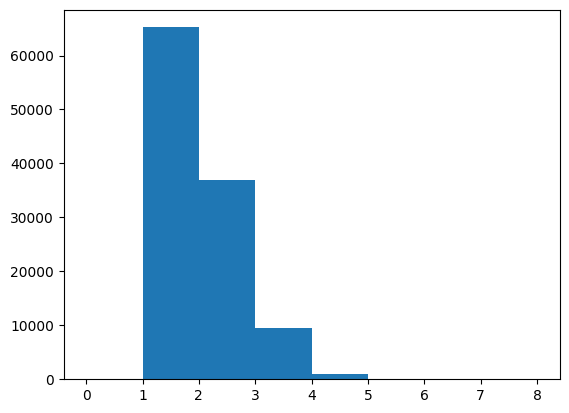

In [25]:
#hsplit = r.TH1D("hsplit","nsplit",8,0,8)
#root_numpy.fill_hist(hsplit,nsplit)
#csplit = r.TCanvas()
#hsplit.Draw()

plt.figure()
plt.hist(nsplit.values, range = (0,8),bins=8)
plt.show()

We defined some new variables, so let's save those, for each of our datasets!

In [22]:
# adding computed information to our dataset
trackdf["nseg"] = nseg
trackdf["npl"] = npl
trackdf["fedraeff"] = nseg/npl

# group by same MCTrack and MCEvent
simdf = simdf.query("MCEvent>=0")
nsegtrue = simdf.groupby(["brickID","MCEvent","MCTrack"]).count()["ID"] #true length of the Monte Carlo track

nsegtrue = nsegtrue.reset_index()
nsegsamemc = nsegsamemc.reset_index()

trackdf = trackdf.reset_index().merge(nsegtrue, how = "left", on = ["brickID","MCEvent","MCTrack"])
trackdf = trackdf.merge(nsegsamemc, how = "left", on = ["brickID","FEDRATrackID","MCEvent","MCTrack"])

In [23]:
# renaming labels
trackdf["PID"] = trackdf["PID_x"]
trackdf["ID"] = trackdf["ID_x"]
trackdf["nsegsamemc"] = trackdf["PID_y"]
trackdf["nsegtrue"] = trackdf["ID_y"]

del trackdf["ID_y"]
del trackdf["ID_x"]
del trackdf["PID_y"]
del trackdf["PID_x"]

In [24]:
# adding computed information to our dataset
o_trackdf_1["nseg"] = o_nseg_1
o_trackdf_1["npl"] = o_npl_1
o_trackdf_1["fedraeff"] = o_nseg_1/o_npl_1

# group by same MCTrack and MCEvent
otherdf_1 = otherdf_1.query("MCEvent>=0")
o_nsegtrue_1 = otherdf_1.groupby(["brickID","MCEvent","MCTrack"]).count()["ID"] #true length of the Monte Carlo track

o_nsegtrue_1 = o_nsegtrue_1.reset_index()
o_nsegsamemc_1 = o_nsegsamemc_1.reset_index()

o_trackdf_1 = o_trackdf_1.reset_index().merge(o_nsegtrue_1, how = "left", on = ["brickID","MCEvent","MCTrack"])
o_trackdf_1 = o_trackdf_1.merge(o_nsegsamemc_1, how = "left", on = ["brickID","FEDRATrackID","MCEvent","MCTrack"])

In [25]:
# renaming labels
o_trackdf_1["PID"] = o_trackdf_1["PID_x"]
o_trackdf_1["ID"] = o_trackdf_1["ID_x"]
o_trackdf_1["nsegsamemc"] = o_trackdf_1["PID_y"]
o_trackdf_1["nsegtrue"] = o_trackdf_1["ID_y"]

del o_trackdf_1["ID_y"]
del o_trackdf_1["ID_x"]
del o_trackdf_1["PID_y"]
del o_trackdf_1["PID_x"]

In [26]:
# adding computed information to our dataset
o_trackdf_2["nseg"] = o_nseg_2
o_trackdf_2["npl"] = o_npl_2
o_trackdf_2["fedraeff"] = o_nseg_2/o_npl_2

# group by same MCTrack and MCEvent
otherdf_2 = otherdf_2.query("MCEvent>=0")
o_nsegtrue_2 = otherdf_2.groupby(["brickID","MCEvent","MCTrack"]).count()["ID"] #true length of the Monte Carlo track

o_nsegtrue_2 = o_nsegtrue_2.reset_index()
o_nsegsamemc_2 = o_nsegsamemc_2.reset_index()

o_trackdf_2 = o_trackdf_2.reset_index().merge(o_nsegtrue_2, how = "left", on = ["brickID","MCEvent","MCTrack"])
o_trackdf_2 = o_trackdf_2.merge(o_nsegsamemc_2, how = "left", on = ["brickID","FEDRATrackID","MCEvent","MCTrack"])

In [27]:
# renaming labels
o_trackdf_2["PID"] = o_trackdf_2["PID_x"]
o_trackdf_2["ID"] = o_trackdf_2["ID_x"]
o_trackdf_2["nsegsamemc"] = o_trackdf_2["PID_y"]
o_trackdf_2["nsegtrue"] = o_trackdf_2["ID_y"]

del o_trackdf_2["ID_y"]
del o_trackdf_2["ID_x"]
del o_trackdf_2["PID_y"]
del o_trackdf_2["PID_x"]

In [64]:
# adding computed information to our dataset
o_trackdf_m["nseg"] = o_nseg_m
o_trackdf_m["npl"] = o_npl_m
o_trackdf_m["fedraeff"] = o_nseg_m/o_npl_m

# group by same MCTrack and MCEvent
otherdf_m = otherdf_m.query("MCEvent>=0")
o_nsegtrue_m = otherdf_m.groupby(["brickID","MCEvent","MCTrack"]).count()["ID"] #true length of the Monte Carlo track

o_nsegtrue_m = o_nsegtrue_m.reset_index()
o_nsegsamemc_m = o_nsegsamemc_m.reset_index()

o_trackdf_m = o_trackdf_m.reset_index().merge(o_nsegtrue_m, how = "left", on = ["brickID","MCEvent","MCTrack"])
o_trackdf_m = o_trackdf_m.merge(o_nsegsamemc_m, how = "left", on = ["brickID","FEDRATrackID","MCEvent","MCTrack"])

In [65]:

# renaming labels
o_trackdf_m["PID"] = o_trackdf_m["PID_x"]
o_trackdf_m["ID"] = o_trackdf_m["ID_x"]
o_trackdf_m["nsegsamemc"] = o_trackdf_m["PID_y"]
o_trackdf_m["nsegtrue"] = o_trackdf_m["ID_y"]

del o_trackdf_m["ID_y"]
del o_trackdf_m["ID_x"]
del o_trackdf_m["PID_y"]
del o_trackdf_m["PID_x"]

## computing efficiencies
Compute segment reconstruction efficiency for all of the dataframes

In [28]:
# computing efficiency
trackdf["efficiency"] = trackdf["nsegsamemc"]/trackdf["nsegtrue"]

In [66]:
o_trackdf_1["efficiency"] = o_trackdf_1["nsegsamemc"]/o_trackdf_1["nsegtrue"]
o_trackdf_2["efficiency"] = o_trackdf_2["nsegsamemc"]/o_trackdf_2["nsegtrue"]
o_trackdf_m["efficiency"] = o_trackdf_m["nsegsamemc"]/o_trackdf_m["nsegtrue"]

In [55]:
import matplotlib 
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
plt.rcParams['text.usetex'] = True


Efficiency comparison for reduced smearing - big improvement!

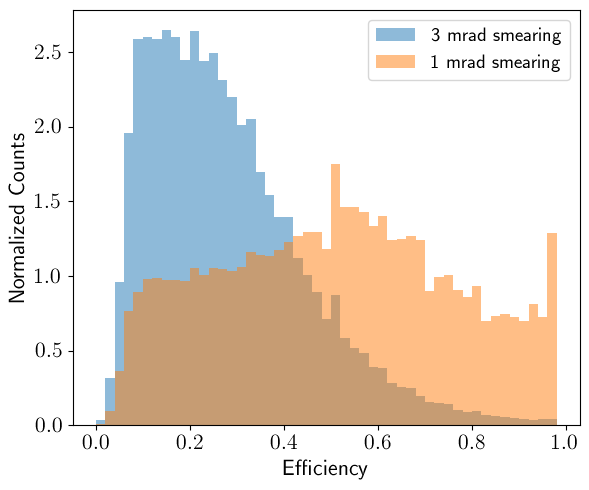

In [101]:
longtracks = trackdf.query("nsegtrue>{}".format(minnseg))
o_longtracks_m = o_trackdf_m.query("nsegtrue>{}".format(minnseg))

fig, ax = plt.subplots(figsize=(6, 5), tight_layout=True)
ax.hist(longtracks["efficiency"],bins=np.arange(0, 1, 0.02), alpha=0.5, density=True, label=r"3 mrad smearing", color='tab:blue')
ax.hist(o_longtracks_m["efficiency"],bins=np.arange(0, 1, 0.02), alpha=0.5, density=True, label=r"1 mrad smearing", color='tab:orange')

plt.legend(fontsize=14)
plt.xlabel("Efficiency", fontsize=16)
plt.ylabel("Normalized Counts", fontsize=16)
plt.savefig("Figures/MuonBackSim/efficiency_3mrad_v_1mrad_longtracks_min32_1dhist.pdf")
plt.show()

Efficiency comparison for reduced track density - one order of magnitude seems sufficienct. But how do we choose which tracks to eliminate?

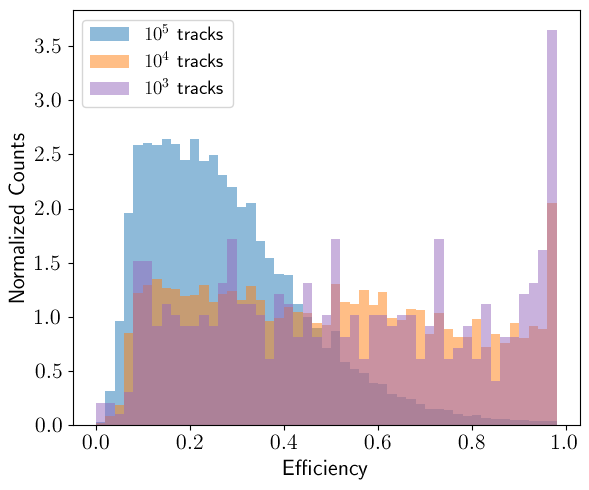

In [102]:
longtracks = trackdf.query("nsegtrue>{}".format(minnseg))
o_longtracks_1 = o_trackdf_1.query("nsegtrue>{}".format(minnseg))
o_longtracks_2 = o_trackdf_2.query("nsegtrue>{}".format(minnseg))

fig, ax = plt.subplots(figsize=(6, 5), tight_layout=True)
a = 0.5
ax.hist(longtracks["efficiency"],bins=np.arange(0, 1, 0.02), alpha=a, density=True, label=r"$10^5$ tracks", color='tab:blue')
ax.hist(o_longtracks_2["efficiency"],bins=np.arange(0, 1, 0.02), alpha=a, density=True, label=r"$10^4$ tracks", color='tab:orange')
ax.hist(o_longtracks_1["efficiency"],bins=np.arange(0, 1, 0.02), alpha=a, density=True, label=r"$10^3$ tracks", color='tab:purple')

plt.legend(fontsize=14)
plt.xlabel("Efficiency", fontsize=16)
plt.ylabel("Normalized Counts", fontsize=16)
plt.savefig("Figures/MuonBackSim/efficiency_all_v_1k_v_10k_longtracks_min32_1dhist.pdf")
plt.show()

## Efficiency plots vs other variables

Let's first look at efficiency as a function of the track angle in the XZ-YZ plane

In [57]:
longtracks["Theta"] = np.sqrt(longtracks["TX"]**2 + longtracks["TY"]**2)
o_longtracks_1["Theta"] = np.sqrt(o_longtracks_1["TX"]**2 + o_longtracks_1["TY"]**2)
o_longtracks_2["Theta"] = np.sqrt(o_longtracks_2["TX"]**2 + o_longtracks_2["TY"]**2)

<ipython-input-57-afcd637f87c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  longtracks["Theta"] = np.sqrt(longtracks["TX"]**2 + longtracks["TY"]**2)
<ipython-input-57-afcd637f87c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o_longtracks_1["Theta"] = np.sqrt(o_longtracks_1["TX"]**2 + o_longtracks_1["TY"]**2)
<ipython-input-57-afcd637f87c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [58]:
#profefftheta = r.TProfile("profefftheta","Efficiency for different theta angles;theta[rad];efficiency",11,0,1.1,0.,1.1)

#rootnumpy_myutils.fillprofile2D(profefftheta,longtracks["Theta"],longtracks["efficiency"])


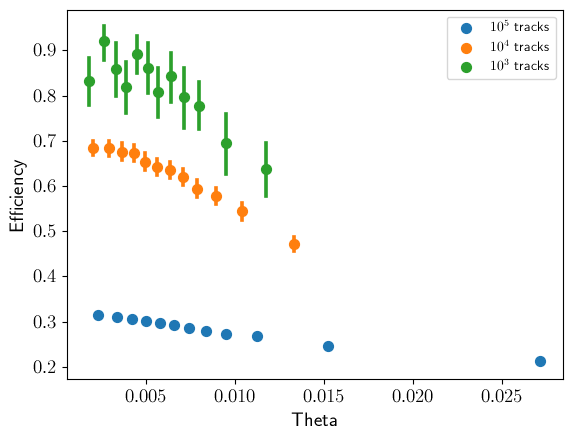

In [64]:
plt.figure()
seaborn.regplot(x=longtracks["Theta"],y=longtracks["efficiency"],x_bins=12,marker='o',fit_reg=False, label=r"$10^5$ tracks")
seaborn.regplot(x=o_longtracks_2["Theta"],y=o_longtracks_2["efficiency"],x_bins=12,marker='o',fit_reg=False, label=r"$10^4$ tracks")
seaborn.regplot(x=o_longtracks_1["Theta"],y=o_longtracks_1["efficiency"],x_bins=12,marker='o',fit_reg=False, label=r"$10^3$ tracks")
plt.xlabel("Theta", fontsize=14)
plt.ylabel("Efficiency", fontsize=14)
plt.legend()
plt.savefig("Figures/MuonBackSim/efficiency_v_theta_all_v_1k_v_10k_longtracks_min32_scatter.pdf")
plt.show()

Next, we have efficiency for different momenta of tracks (only considering long tracks with $\geq 31$ segments

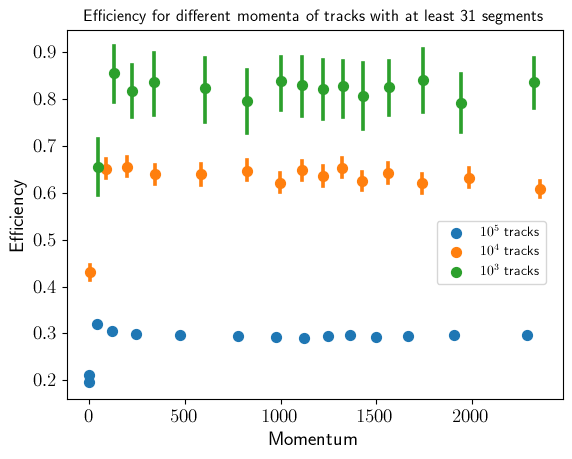

In [74]:
plt.figure()
seaborn.regplot(x=longtracks["P"],y=longtracks["efficiency"],x_bins=15,marker='o',fit_reg=False, label=r"$10^5$ tracks")
seaborn.regplot(x=o_longtracks_2["P"],y=o_longtracks_2["efficiency"],x_bins=15,marker='o',fit_reg=False, label=r"$10^4$ tracks")
seaborn.regplot(x=o_longtracks_1["P"],y=o_longtracks_1["efficiency"],x_bins=15,marker='o',fit_reg=False, label=r"$10^3$ tracks")
plt.title("Efficiency for different momenta of tracks with at least {} segments".format(minnseg))
plt.xlabel("Momentum", fontsize=14)
plt.ylabel("Efficiency", fontsize=14)
plt.legend(loc='best', bbox_to_anchor=(0.98, 0.5))
plt.savefig("Figures/MuonBackSim/efficiency_v_p_all_v_1k_v_10k_longtracks_min32_scatter.pdf")
plt.show()

We can also use this to filter tracks with cuts!

In [58]:
longtracks.query("Theta<0.1").head()

,brickID,FEDRATrackID,x,y,z,TX,TY,MCMotherID,P,PdgCode,...,MCTrack,nseg,npl,fedraeff,PID,ID,nsegsamemc,nsegtrue,efficiency,Theta
0,11,0.0,296405.47,85608.240,-77585.0,-0.004385,-0.000597,-1,1309.587800,13,...,0,57,NaN,0.950000,59,4114150,26,51,0.509804,0.004425
1,11,1.0,295521.80,92145.914,-28930.0,0.029279,-0.013724,1848,0.163487,-11,...,0,20,NaN,0.869565,22,1341159,13,52,0.250000,0.032336
2,11,2.0,296744.88,88785.720,-27615.0,-0.009531,0.002441,-1,33.718475,13,...,0,21,NaN,0.954545,21,3792276,11,52,0.211538,0.009838
3,11,3.0,292658.34,93481.940,-39450.0,0.046886,0.025488,31,0.124714,11,...,0,25,NaN,0.806452,30,6120676,16,50,0.320000,0.053366
4,11,4.0,290956.28,88971.950,-14465.0,-0.007713,-0.003366,-1,1330.899800,13,...,0,11,NaN,0.916667,11,5249528,6,56,0.107143,0.008416


In [59]:
longtracks.query("MCEvent==10 and MCTrack==10")


,brickID,FEDRATrackID,x,y,z,TX,TY,MCMotherID,P,PdgCode,...,MCTrack,nseg,npl,fedraeff,PID,ID,nsegsamemc,nsegtrue,efficiency,Theta


In [60]:
longtracks.query("MCEvent==10 and MCTrack==10")[["P","PdgCode"]]

,P,PdgCode


### Organizing the tracks with singletracksdf

This selects the first non-null entry of each column, so only one segment of each brick, event, and track combination. Thus, we are not looking at all base tracks anymore - we're looking at full tracks!

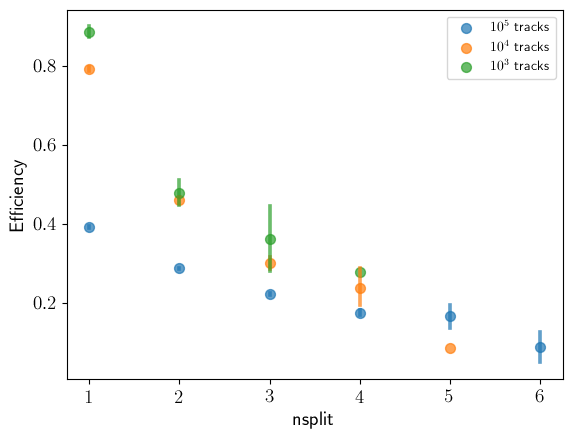

In [75]:
singletrackdf = trackdf.groupby(["brickID","MCEvent","MCTrack"]).first()
singletrackdf["nsplit"] = nsplit

o_singletrackdf_1 = o_trackdf_1.groupby(["brickID","MCEvent","MCTrack"]).first()
o_singletrackdf_1["nsplit"] = o_nsplit_1
o_singletrackdf_2 = o_trackdf_2.groupby(["brickID","MCEvent","MCTrack"]).first()
o_singletrackdf_2["nsplit"] = o_nsplit_2
#profeffnsplit = r.TProfile("profnsplit","Efficiency for different nsplit;nsplit;efficiency",8,0,8,0.,1.1)

#rootnumpy_myutils.fillprofile2D(profeffnsplit,singletrackdf["nsplit"],singletrackdf["efficiency"])

plt.figure()
seaborn.regplot(x=singletrackdf["nsplit"],y=singletrackdf["efficiency"], fit_reg=False, marker='o', x_bins=[1, 2, 3, 4, 5, 6], label=r"$10^5$ tracks", scatter_kws={'alpha':0.7})
seaborn.regplot(x=o_singletrackdf_2["nsplit"],y=o_singletrackdf_2["efficiency"], fit_reg=False, marker='o', x_bins=[1, 2, 3, 4, 5, 6, 7], label=r"$10^4$ tracks", scatter_kws={'alpha':0.7})
seaborn.regplot(x=o_singletrackdf_1["nsplit"],y=o_singletrackdf_1["efficiency"], fit_reg=False, marker='o', x_bins=[1, 2, 3, 4, 5, 6, 7], label=r"$10^3$ tracks", scatter_kws={'alpha':0.7})
plt.xlabel("nsplit", fontsize=14)
plt.ylabel("Efficiency", fontsize=14)
plt.savefig("Figures/MuonBackSim/efficiency_v_nsplit_all_v_1k_v_10k_scatter.pdf")
plt.legend()
plt.show()

This is what the dataframe looks like

In [47]:
singletrackdf # all reconstructed volume tracks

# some variable definitions:
# nsegsamemc - # of segments from track that belong to same MCTrack
# nseg - from reconstruction
# nsegtrue - from MC
# efficiency - ratio of nsegsamemc and nsegtrue

FEDRATrackID          x          y        z  \
brickID MCEvent MCTrack                                                
11      1       0            127018.0  295863.50  91817.125 -77585.0   
        2       0                 2.0  296744.88  88785.720 -27615.0   
                147          108217.0  296805.97  88841.550 -36820.0   
                184          123392.0  296753.70  88911.770 -34190.0   
                225          135818.0  296820.03  88860.750 -43395.0   
...                               ...        ...        ...      ...   
        99995   74           167791.0  290247.00  87960.445 -77585.0   
        99996   0             84208.0  294993.16  90944.820 -18410.0   
        99997   0            106287.0  292421.66  89197.780 -26300.0   
        99998   0              7757.0  291479.62  88591.970 -77585.0   
        99999   0             49803.0  290425.12  87407.750 -76270.0   

                               TX        TY  MCMotherID            P  PdgCode  \
brickID MCEvent MCTrack                                                         
11      1       0       -0.003110  0.001690          -1   561.375240       13   
        2       0       -0.009531  0.002441          -1    33.718475       13   
                147     -0.006269 -0.003229          -1   969.153750       13   
                184     -0.025714 -0.039191         634     0.281712       11   
                225     -0.008877 -0.026213           0     0.376496      -11   
...                           ...       ...         ...          ...      ...   
        99995   74       0.005114 -0.002103          -1   745.750730       13   
        99996   0       -0.025404 -0.002605         178     0.727012      -11   
        99997   0        0.006984 -0.029302         160     0.278727      -11   
        99998   0       -0.000899 -0.005463          -1  1876.766600       13   
        99999   0       -0.002948  0.003894          -1   171.877140       13   

                         simulation  nseg  npl  fedraeff  PID       ID  \
brickID MCEvent MCTrack                                                  
11      1       0              True    34  NaN  0.971429   59      114   
        2       0              True    21  NaN  0.954545   21  3792276   
                147            True    11  NaN  0.785714   28  5247900   
                184            True     4  NaN  1.000000   26  4529389   
                225            True     4  NaN  1.000000   33      222   
...                             ...   ...  ...       ...  ...      ...   
        99995   74             True     6  NaN  0.750000   59  1049492   
        99996   0              True    13  NaN  0.866667   14  1614611   
        99997   0              True     8  NaN  1.000000   20  1312590   
        99998   0              True    57  NaN  0.950000   59  4351236   
        99999   0              True    55  NaN  0.932203   58  6253957   

                         nsegsamemc  nsegtrue  efficiency  nsplit  
brickID MCEvent MCTrack                                            
11      1       0                30        56    0.535714       1  
        2       0                11        52    0.211538       2  
                147               5        12    0.416667       1  
                184               3        11    0.272727       1  
                225               3         9    0.333333       1  
...                             ...       ...         ...     ...  
        99995   74                4        13    0.307692       1  
        99996   0                 8        53    0.150943       2  
        99997   0                 7        55    0.127273       1  
        99998   0                22        51    0.431373       1  
        99999   0                12        54    0.222222       2  

[112632 rows x 19 columns]

And once again, we can do some filtration.

In [48]:
simdf.query('FEDRATrackID==106287.0')

,ID,PID,x,y,z,TX,TY,MCEvent,MCTrack,MCMotherID,P,PdgCode,FEDRATrackID,brickID
1817274,6873017,13,292404.70,89179.80,-17095.0,0.000689,-0.004724,99997,0,-1,49.448555,13,106287.0,11
1945528,6873016,14,292405.75,89184.30,-18410.0,0.001397,-0.005365,99997,0,-1,49.451225,13,106287.0,11
2073378,6873015,15,292406.66,89188.97,-19725.0,0.000241,0.000328,99997,0,-1,49.453384,13,106287.0,11
2200343,6873014,16,292407.72,89193.55,-21040.0,-0.003211,-0.006818,99997,0,-1,49.455420,13,106287.0,11
2326921,6873013,17,292408.78,89198.01,-22355.0,0.003000,-0.001093,99997,0,-1,49.458885,13,106287.0,11
2453026,6873012,18,292409.80,89202.81,-23670.0,0.003438,-0.005105,99997,0,-1,49.460873,13,106287.0,11
2578654,6873011,19,292411.16,89207.43,-24985.0,-0.002282,-0.002532,99997,0,-1,49.462883,13,106287.0,11
2602320,1312590,20,292421.66,89197.78,-26300.0,0.006984,-0.029302,19459,161,160,0.278727,-11,106287.0,11


We can also plot nsplit to see how the density changes track characteristics

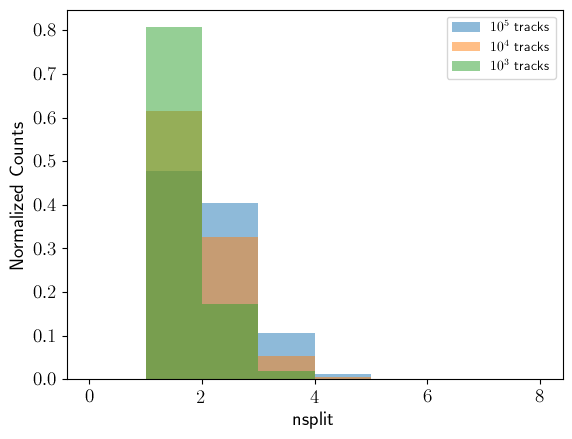

In [81]:
plt.figure()
plt.hist(singletrackdf.query("MCTrack==0")["nsplit"].values, range = (0,8),bins=8, alpha=0.5, label=r"$10^5$ tracks", density=True)
plt.hist(o_singletrackdf_2.query("MCTrack==0")["nsplit"].values, range = (0,8),bins=8, alpha=0.5, label=r"$10^4$ tracks", density=True)
plt.hist(o_singletrackdf_1.query("MCTrack==0")["nsplit"].values, range = (0,8),bins=8, alpha=0.5, label=r"$10^3$ tracks", density=True)
plt.legend()
plt.xlabel("nsplit", fontsize=14)
plt.ylabel("Normalized Counts", fontsize=14)
plt.savefig("Figures/MuonBackSim/nsplit_all_v_1k_v_10k_1dhist.pdf")
plt.show()

We can also plot efficiency of tracks using singletrackdf, comparing the different densities 

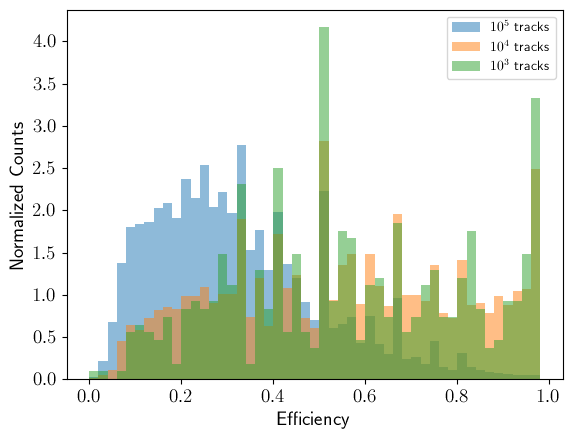

In [82]:
plt.figure()
plt.hist(singletrackdf["efficiency"].values, bins=np.arange(0, 1, 0.02), label=r"$10^5$ tracks", alpha=0.5, density=True)
plt.hist(o_singletrackdf_2["efficiency"].values, bins=np.arange(0, 1, 0.02), label=r"$10^4$ tracks", alpha=0.5, density=True)
plt.hist(o_singletrackdf_1["efficiency"].values, bins=np.arange(0, 1, 0.02), label=r"$10^3$ tracks", alpha=0.5, density=True)
plt.xlabel("Efficiency", fontsize=14)
plt.ylabel("Normalized Counts", fontsize=14)
plt.legend()

plt.savefig("Figures/MuonBackSim/efficiency_all_v_1k_v_10k_1dhist.pdf")
plt.show()

What I have worked on: 
1. make same dataset with only muons and see how it changes
- overall seems to have higher efficiencies with only muons
2. decrease smearing to 1 milliradian instead of 3 milliradians
- overall increases efficiency, but how feasible is this?
3. only a portion of the tracks, first 1000 or so, then 10000, how much does efficiency improve
- this also improves efficiency, but how do we select what tracks to omit?

Basically, work with subsets of the dataframe to see how efficiency changes

- Compare these to figure out how to maximize efficiency
- improve tracking reconstruction by looking at base tracks, then look at vertices themselves